In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

In [22]:
url = 'https://www.hanwhaaerospace.com/kor/media/newsroom/list.do'
wd = webdriver.Chrome()
wd.get(url)

In [33]:
while True:
    try:
        scroll = wd.find_element(By.XPATH, '/html/body')
        scroll.send_keys(Keys.PAGE_DOWN)
        scroll.send_keys(Keys.PAGE_DOWN)
        time.sleep(1)
        button = wd.find_element(By.XPATH, '/html/body/div[3]/main/div/section[3]/div[3]/button')
        button.click()
        time.sleep(5)
    except:
        break

In [ ]:
from bs4 import BeautifulSoup
year = dict()
year2 = dict()
soup = BeautifulSoup(wd.page_source, "html.parser")
tag_lis = soup.find("ul", class_ = 'news-list').find_all("li")
lst = ["체결", "수상", "협력", "개발", "수출", "계약", "획득", "구축", "기여"]
for tag_li in tag_lis:
    y = tag_li.select_one("span.date").get_text()[:4]
    if y in year:
        year[y] += 1
    else:
        year[y] = 1

    text = tag_li.find("span", class_ = 'span').get_text()
    for i  in lst:
        if i in text:
            if y in year2:
                year2[y] += 1
            else:
                year2[y] = 1
            break

  

In [37]:
year2

{'2025': 27,
 '2024': 22,
 '2023': 16,
 '2022': 13,
 '2021': 23,
 '2020': 4,
 '2019': 1,
 '2017': 8,
 '2016': 4,
 '2015': 7}

<Axes: xlabel='연도'>

C:\Users\acorn-1class\AppData\Roaming\Python\Python314\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\acorn-1class\AppData\Roaming\Python\Python314\site-packages\IPython\core\events.py:82: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\acorn-1class\AppData\Roaming\Python\Python314\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\acorn-1class\AppData\Roaming\Python\Python314\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\acorn-1class\AppData\Roaming\Python\Python314\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) miss

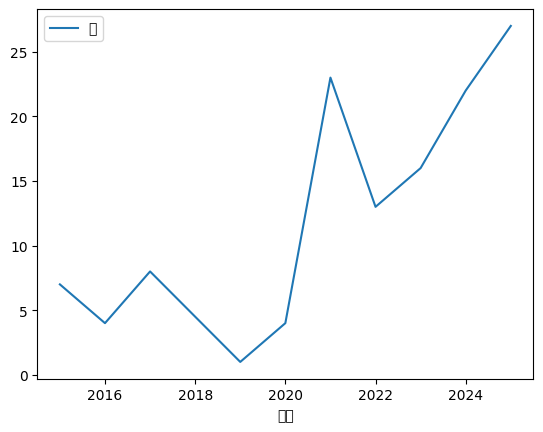

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(list(year.items()), columns=["연도", "값"])
df2 = pd.DataFrame(list(year2.items()), columns=["연도", "값"])

df["연도"] = df["연도"].astype(int)
df2["연도"] = df2["연도"].astype(int)

df2.plot(x="연도", y="값")

### 태훈님 코드

In [44]:
import urllib.request
#-------------------------------------------------------------한화 주식정보 불러오기 + 추출용 리스트
url='https://www.hanwhaaerospace.com/kor/ir/stock-info.do'
html=urllib.request.urlopen(url)
stock_data=[]
a=[]
result=[]
graph_name=[]
graph_val=[]
cnt=0
original_gain=[]
soup = BeautifulSoup(html, "html.parser")
#-------------------------------------------------------------------------------------#1. 주식 발행 내역 추출 코드
stocks_data=soup.find("table",class_="caption1-kr").find("tbody").select("td")

for i in stocks_data:
    stock_data.append(i.get_text())

for i in range(3):
    for j in range(4):
        a.append(stock_data[j+(i*4)])
    result.append(a[i*4:i*4+4])
#---------------------------------------------------------------------------------------주주구성 추출 코드

stock_csv=pd.DataFrame(result,columns=["주식의 종류","발행주식주","자본금","비고"])
result.clear()


graph_nd=soup.find("div",class_="config").find("div",class_="graph").find_all("p")
graph_vd=soup.find("div",class_="config").find("div",class_="graph").find_all("h2")

for i in range(4):
    result.append([graph_nd[i].get_text(),graph_vd[i].get_text()])

test2=pd.DataFrame(result,columns=["주주구성","비율"])

#----------------------------------------------------------------------------------------------당기 순 이익 추출 코드
gain=soup.find("div",class_="table-wrap caption1-en column-8").find("tbody").find_all("tr")

a.clear()
for i in gain[2]:
    a.append(i.get_text())

for i in range(1,len(a),2):   #\n값때문에 짝수 리스트만 출력
    original_gain.append(a[i])

original_gain

test3=pd.DataFrame(original_gain,index=["구분","단위","제48기","제47기","제46기","제45기","제44기"])

test3


,0
구분,(별도)당기순이익
단위,백만원
제48기,"1,038,040"
제47기,"648,960"
제46기,"306,700"
제45기,"119,344"
제44기,"28,407"
